In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, random

In [2]:
def get_images_and_labels():
    data = pd.read_csv('zip.train.csv')
    labels = data.V1.to_numpy()
    images = data.drop(columns=['Unnamed: 0', 'V1']).to_numpy()
    return images, labels

In [3]:
images, labels = get_images_and_labels()

In [4]:
def showImage(pixels):
    img_pixels = pixels.reshape((16,16))
    plt.imshow(img_pixels, cmap='gray')
    plt.show()

In [6]:
def euclidean_distance(a, b):
    return np.linalg.norm(a-b)

In [7]:
class KMeans:
    def __init__(self, k):
        self.k = k          
        self.means = None 
        self.labels = None

    def get_item_label(self, x):
        distances = np.zeros(self.k)

        for i in range(self.k):
            centroid = self.means[i]
            distances[i] = euclidean_distance(centroid, x)

        return np.argmin(distances)
    
    
    def get_cluster_labels(self, data):
        cluster_labels = [None] * data.shape[0]

        for index in range(len(data)):
            item = data[index]
            label = self.get_item_label(item)
            cluster_labels[index] = label

        return np.array(cluster_labels)
    
    def get_initial_centroids(self, data):
        return data[np.random.choice(data.shape[0], self.k, replace=False)]

    def train(self, data):
        self.means = self.get_initial_centroids(data)
        
        while True:
            new_labels = self.get_cluster_labels(data)

            if np.array_equal(self.labels, new_labels):
                return

            self.labels = new_labels

            for i in range(self.k):
                i_points = [p for p, a in zip(data, self.labels) if a == i]
                if i_points:
                    self.means[i] = np.mean(i_points, axis=0)

In [12]:
model = KMeans(5)

In [13]:
model.train(images)

In [14]:
model.labels

array([3, 0, 3, ..., 2, 0, 1])

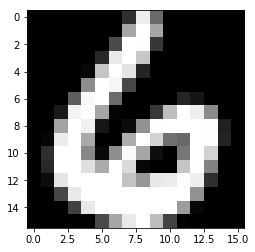

In [16]:
showImage(images[0])